In [0]:
#Created By Panther Creek High School Data Science Club
#CSV File can be found on pchsdatascience.com

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import io
import math
import requests


print(tf.test.gpu_device_name())


#Uncomment if you want to manually load a csv
'''
print("Please Load Production CSV File")
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["ProductionData.csv"]))
'''

# Fetch Dataset from Our Website
response = requests.get('https://pchsdatascience.com/wp-content/uploads/2019/12/ProductionData.csv')
file_object = io.StringIO(response.content.decode('utf-8'))
data = pd.read_csv(file_object)

#Load CSV Data
data.head()

#Remove Header and Footer from file
d1 = data.iloc[2:698]
dates = d1.iloc[:,0]

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 2} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [0]:
#Create Pandas Dataframe
turkey = d1.iloc[:,13]
pd.to_numeric(turkey)
dataset = pd.DataFrame({'Date': dates, 'Weight': turkey})
dataset = dataset.iloc[::-1]
dataset.index = np.arange(0, len(dataset))
dataset.index.name = "Month number"

#view dataframe
dataset

,Date,Weight
Month number,,
0,Jan-1960,22.1
1,Feb-1960,14.0
2,Mar-1960,13.4
3,Apr-1960,16.2
4,May-1960,27.1
...,...,...
691,Aug-2017,543.1
692,Sep-2017,467.9
693,Oct-2017,554.2


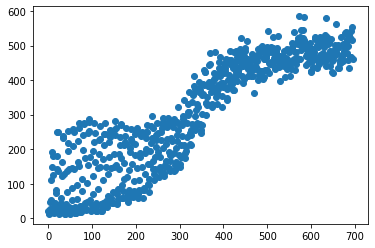

In [0]:
#Create Array stroring Monthly Data from data frame
arrdata = dataset.to_numpy()
arrMonth = []
arrDate = []
arrWeight = []

for i in range(len(arrdata)):
    arrMonth.append(i)
    arrDate.append(arrdata[i][0])
    arrWeight.append(float(arrdata[i][1]))

#plot monthly production data
plt.scatter(arrMonth, arrWeight)
plt.show()



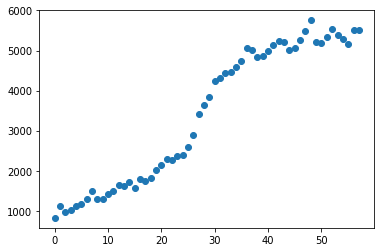

In [0]:
arrWeightyr = []
arrYear = []

#Sum Monthly Data to create yearly data
for i in range(58):
    sum = 0
    for j in range(0,11):
        sum += float(arrWeight[12*i + j])
    arrWeightyr.append(sum)
    arrYear.append(i)
   
plt.scatter(arrYear, arrWeightyr)

In [0]:

x_train = []
y_train = []
x_val = []
y_val = []

#Split data in half for training and validation

#Use monthly data to create training data (Give model as much data as possible)
for i in arrMonth:
    if i % 2 == 0:
        x_train.append(i)
        y_train.append(arrWeight[i])
    else:
        x_val.append(i)
        y_val.append(arrWeight[i])


Important Note on Model:

Since we are dealing with fairly large numbers and our loss function is Mean Squared Error our gradient and loss is going to be massively large, to reduce the size of these numbers we will use a process called batch normalization. This will scale all the neuron values down with respect to each other's magnitudes.

tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001)

Since it is possible for a previous neuron to be zero, we need to add a small number to prevent division by zero this is done though "epsilon" which is essentially just a small number we set.




In [0]:
#Define Sequential Machine Learning Model


#In order to save time training - we have already trained the model for for you and will just download the model from our servers
#Set this option to false if you want to retrain live (might take a while)
LoadPretrainedModel = False

if LoadPretrainedModel == True:
  model_data = requests.get('https://pchsdatascience.com/wp-content/uploads/2019/12/ProductionData.csv')
  model_file = io.StringIO(response.content.decode('utf-8'))
  
else:
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Dense(10, input_shape=[1], activation='relu'),
      tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001),
      tf.keras.layers.Dense(90, activation='relu'),
      tf.keras.layers.Dense(1)
      ])

  #sgd = tf.optimizers.SGD(lr=.1, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

  #adjust number of epochs to suit processing power and required training
  model.fit(x_train, y_train, epochs=1500, validation_data=(x_val,y_val))



Train on 348 samples, validate on 348 samples
Epoch 1/1500
348/348 [==============================] - 0s 543us/sample - loss: 122205.8606 - acc: 0.0000e+00 - val_loss: 119749.2608 - val_acc: 0.0000e+00
Epoch 2/1500
348/348 [==============================] - 0s 98us/sample - loss: 121847.0023 - acc: 0.0000e+00 - val_loss: 119210.3314 - val_acc: 0.0000e+00
Epoch 3/1500
348/348 [==============================] - 0s 108us/sample - loss: 121486.3533 - acc: 0.0000e+00 - val_loss: 118676.2158 - val_acc: 0.0000e+00
Epoch 4/1500
348/348 [==============================] - 0s 93us/sample - loss: 121091.9181 - acc: 0.0000e+00 - val_loss: 118051.3097 - val_acc: 0.0000e+00
Epoch 5/1500
348/348 [==============================] - 0s 92us/sample - loss: 120639.1730 - acc: 0.0000e+00 - val_loss: 117473.2503 - val_acc: 0.0000e+00
Epoch 6/1500
348/348 [==============================] - 0s 112us/sample - loss: 120095.9542 - acc: 0.0000e+00 - val_loss: 116775.1488 - val_acc: 0.0000e+00
Epoch 7/1500
348/348 

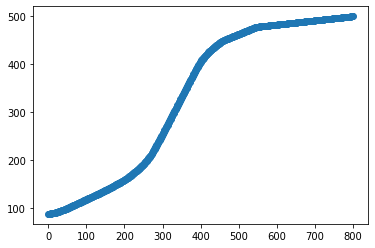

In [0]:
arrx = []
arry = []
arryyr = []

#Generate graph of the model
for i in range(0,800):
    arrx.append(i)
    prediction = model.predict([i]) 
    arry.append(prediction[0][0])
    arryyr.append(prediction[0][0] * 12)

#graph plot
plt.scatter(arrx, arry)

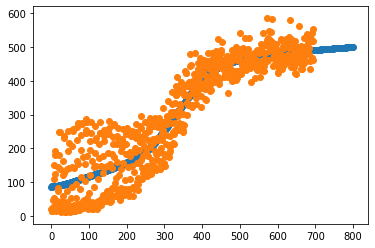

In [0]:
#graph model with data overlain to visually see how well the model fits
plt.scatter(arrx, arry)
plt.scatter(arrMonth, arrWeight)
plt.show()

#Seems to fit the data pretty well!

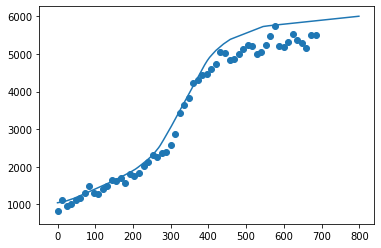

In [0]:
arrYM = []
for i in arrYear:
  arrYM.append(i*12)
  
plt.plot(arrx, arryyr)
plt.scatter(arrYM, arrWeightyr)
plt.show()

In [0]:
#Allow user to enter a year to predict:

def ytm(x):
    return((x-1960) * 12)

print("Enter a year to predict production:")
inval = int(input())
sum = 0  
for i in range(ytm(inval), ytm(inval) + 12):
  pred = model.predict([i])
  sum += pred[0][0]

print("Predicted Average Monthly Production Prediction (In millions of pounds): ", sum / 12)
print("Predicted Annual Production (In millions of pounds): ", sum)

try:
  yp = arrWeightyr[inval - 1960]
  print("The actual annual production weight: ", yp)
  print("The percent error on the prediction was: ", 100*(abs(yp - sum)/yp), "%")
except:
  print("No Production Data was found for this Date")



Enter a year to predict production:
2018
Predicted Average Monthly Production Prediction (In millions of pounds):  491.8091176350911
Predicted Annual Production (In millions of pounds):  5901.709411621094
No Production Data was found for this Date


In [0]:
#export trained model for future use


model.save("turkey.h5")
print("Saved model to disk")

files.download('turkey.h5')

Saved model to disk
